In [193]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


In [203]:
df = pd.read_csv("../../datasets_2/Food Recipes/5000 Indian Cuisines Dataset(with images)/cuisine_updated.csv")

In [204]:
'''
# Create a dictionary for the words you want to replace
replacement_dict = {
    "Non Vegeterian": "Non-Vegetarian",
    "No Onion": "No-Onion",
    "No Garlic": "No-Garlic",
    "High Protein": "High-Protein"
}

# Replace the words in the 'diet' column
df['diet'] = df['diet'].replace(replacement_dict, regex=True)
'''

'\n# Create a dictionary for the words you want to replace\nreplacement_dict = {\n    "Non Vegeterian": "Non-Vegetarian",\n    "No Onion": "No-Onion",\n    "No Garlic": "No-Garlic",\n    "High Protein": "High-Protein"\n}\n\n# Replace the words in the \'diet\' column\ndf[\'diet\'] = df[\'diet\'].replace(replacement_dict, regex=True)\n'

In [205]:
df.head(1)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...,"To begin making the Doddapatre Tambuli, first ...",1


In [206]:
df.shape

(4466, 10)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4466 non-null   object
 1   image_url        4466 non-null   object
 2   description      4466 non-null   object
 3   cuisine          4458 non-null   object
 4   course           4424 non-null   object
 5   diet             4424 non-null   object
 6   prep_time        4454 non-null   object
 7   ingredients      4466 non-null   object
 8   instructions     4466 non-null   object
 9   image_available  4466 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 349.0+ KB


In [208]:
temp = df.iloc[1039]
for i in temp:
    print("#/n",i)

#/n Chai Ka Masala Recipe - Homemade Spice Powder for Tea
#/n https://www.archanaskitchen.com/images/archanaskitchen/BasicRecipes_Spice_Powders/Tea_Masala_Powder_Recipe_Archanas_Kitchen.jpg
#/n On cold winter days and in wet monsoons, a hot steaming cup of Masala tea is what you need to give that instant energy and warmth. Addition of spices make the tea healthier.The secret behind a perfect cup of Masala tea is the Chai ka Masala or Masala Tea Powder.You can store it for 4-6 months in an air-tight container.
#/n nan
#/n nan
#/n nan
#/n nan
#/n 

							 		1/4 cup Cardamom (Elaichi) Pods/Seeds 

							 		1/4 cup Cloves (Laung) 

							 		1/4 cup Dry ginger powder 

							 		1 tablespoon Whole Black Peppercorns 

							 		2 inch Cinnamon Stick (Dalchini) 

							 		1 teaspoon Nutmeg powder 

#/n To begin making Chai ka Masala, place a pan on medium heat. Add cloves, cardamom, black peppercorns and cinnamon, one by one, in no particular order.Dry roast the spices on medium heat for 

# Step 1: Data Preprocessing

## Clean and Format the Data

In [209]:
# Handle missing values, especially in columns like ingredients or prep_time.

In [210]:
df['ingredients'] = df['ingredients'].str.replace(r'\n|\t', '', regex=True).str.strip().str.lower()


In [211]:
df.head(2)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,"4 cups indian borage (doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ...",1
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archana...,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,"1 fish , nicely washed with bones on (i used p...","To begin making the Fish Tandoori recipe, keep...",1


In [212]:
list_prep_time = df['prep_time'].astype(str).values.tolist()  # Convert all values to string
new_list_prep_time = []
for time_str in list_prep_time:
    try:
        new_list_prep_time.append(int(time_str.split(' ')[-2]))  # Extract the numeric part before 'min'
    except (ValueError, IndexError):
        new_list_prep_time.append(0)  # Handle errors in case the format is unexpected


In [213]:
df['clean_prep_time'] = new_list_prep_time

In [214]:
#df['clean_prep_time']

In [215]:
df.head(1)

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available,clean_prep_time
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,"4 cups indian borage (doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ...",1,30


In [216]:
df['cuisine'] = df['cuisine'].str.lower()
df['course'] = df['course'].str.lower()
df['diet'] = df['diet'].str.lower()


## Convert Categorical Variables(One-Hot Encoding)

In [217]:
df_of_OHE = pd.get_dummies(df, columns=['cuisine', 'course', 'diet'], prefix=['cuisine', 'course', 'diet'])

In [218]:
df_of_OHE.head(1)

,name,image_url,description,prep_time,ingredients,instructions,image_available,clean_prep_time,cuisine_afghan,cuisine_african,...,course_world breakfast,diet_diabetic friendly,diet_eggetarian,diet_gluten free,diet_high protein non vegetarian,diet_high protein vegetarian,diet_no onion no garlic (sattvic),diet_non vegeterian,diet_vegan,diet_vegetarian
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Total in 30 M,"4 cups indian borage (doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ...",1,30,False,False,...,False,False,False,False,False,False,False,False,False,True


In [219]:
categorical_df = df_of_OHE.drop(columns=['name', 'image_url', 'description', 'ingredients', 'instructions', 'image_available','prep_time']).astype(int)

In [220]:
categorical_df.head(1)

,clean_prep_time,cuisine_afghan,cuisine_african,cuisine_andhra,cuisine_arab,cuisine_asian,cuisine_assamese,cuisine_awadhi,cuisine_bengali recipes,cuisine_bihari,...,course_world breakfast,diet_diabetic friendly,diet_eggetarian,diet_gluten free,diet_high protein non vegetarian,diet_high protein vegetarian,diet_no onion no garlic (sattvic),diet_non vegeterian,diet_vegan,diet_vegetarian
0,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Vectorize Ingredients

In [221]:

vectorizer = TfidfVectorizer(max_features=500)  # Adjust features as needed
ingredients_matrix = vectorizer.fit_transform(df_of_OHE['ingredients'])


In [222]:
#print(ingredients_matrix[1])

## Combine Features

In [223]:
df_of_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   name                               4466 non-null   object
 1   image_url                          4466 non-null   object
 2   description                        4466 non-null   object
 3   prep_time                          4454 non-null   object
 4   ingredients                        4466 non-null   object
 5   instructions                       4466 non-null   object
 6   image_available                    4466 non-null   int64 
 7   clean_prep_time                    4466 non-null   int64 
 8   cuisine_afghan                     4466 non-null   bool  
 9   cuisine_african                    4466 non-null   bool  
 10  cuisine_andhra                     4466 non-null   bool  
 11  cuisine_arab                       4466 non-null   bool  
 12  cuisin

In [224]:

features = hstack([categorical_df, ingredients_matrix])


In [225]:
#print(features)

# Step 2: Apply K-means Clustering

## Standardize the Data

In [226]:
scaler = StandardScaler(with_mean=False)  # With sparse matrices, set `with_mean=False`
features_scaled = scaler.fit_transform(features)

In [227]:
#print(features_scaled)

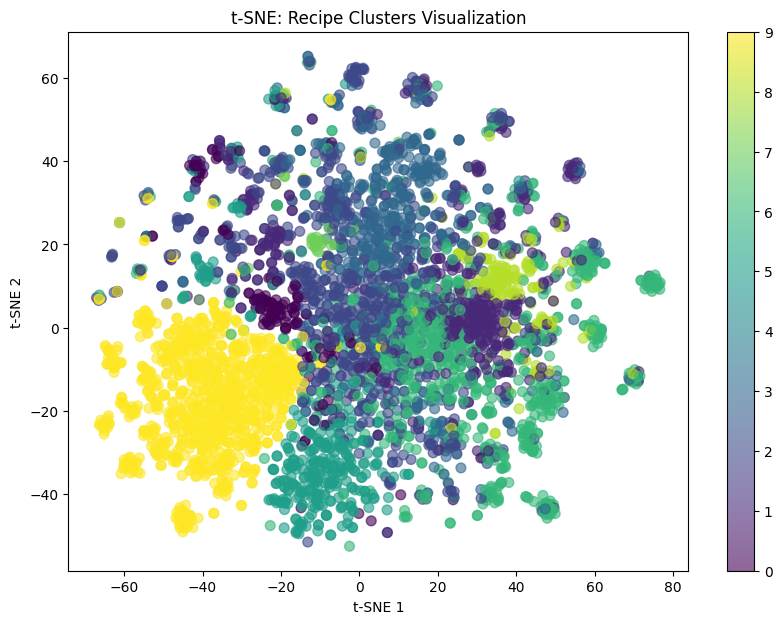

In [228]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you already have your features_scaled from previous steps

# Step 1: Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_scaled)

# Step 2: Use t-SNE with random initialization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='random')
features_tsne = tsne.fit_transform(features_scaled)

# Step 3: Plot the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.title('t-SNE: Recipe Clusters Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


## Fit K-means Model & Cluster Assignment:

In [229]:
model = KMeans(n_clusters=10, random_state=42)  # Adjust the number of clusters
model.fit(features_scaled)

KMeans(n_clusters=10, random_state=42)

In [230]:
model.labels_

array([2, 2, 2, ..., 2, 2, 3])

In [231]:
df_of_OHE['cluster'] = model.labels_

In [232]:
#df_of_OHE['cluster']

# Step 3: Build the Recommender System

## Create Recommendation Function

In [237]:
def recommend_recipe(cuisine, course, diet, prep_time, input_ingredients):
    # Filter based on cuisine, course, diet (if needed)
    subset = df_of_OHE[(df_of_OHE['cuisine_' + cuisine] == 1) & 
                      (df_of_OHE['course_' + course] == 1) & 
                      (df_of_OHE['diet_' + diet] == 1) & 
                      (df_of_OHE['clean_prep_time'] <= prep_time)]
    
    # Transform input ingredients
    input_ingredients = vectorizer.transform([input_ingredients])
    
    # Calculate cosine similarity between input ingredients and subset of data
    subset_matrix = ingredients_matrix[subset.index]
    similarities = cosine_similarity(input_ingredients, subset_matrix)
    
    # Sort by highest similarity and recommend top N recipes
    subset['similarity'] = similarities[0]
    recommendations = subset.sort_values(by='similarity', ascending=False).head(5)
    
    return recommendations[['name', 'image_url', 'description', 'prep_time']]


In [243]:
def recommend_recipe_2(cuisine, course, diet, prep_time, input_ingredients):
    # Filter based on cuisine, course, diet (if needed)
    subset = df_of_OHE[(df_of_OHE['cuisine_' + cuisine] == 1) & 
                      (df_of_OHE['course_' + course] == 1) & 
                      (df_of_OHE['diet_' + diet] == 1) & 
                      (df_of_OHE['clean_prep_time'] <= prep_time)]
    
    # Transform input ingredients
    input_ingredients = vectorizer.transform([input_ingredients])
    
    # Calculate cosine similarity between input ingredients and subset of data
    subset_matrix = ingredients_matrix[subset.index]
    similarities = cosine_similarity(input_ingredients, subset_matrix)
    
    # To avoid SettingWithCopyWarning, use .loc[]
    subset.loc[:, 'similarity'] = similarities[0]
    
    # Sort by highest similarity and recommend top N recipes
    recommendations = subset.sort_values(by='similarity', ascending=False).head(5)
    
    return recommendations[['name', 'image_url', 'description', 'prep_time']]


## Test the Recommender

In [238]:
recommend_recipe('indian', 'side dish', 'vegetarian', 30, 'indian borage, coconut')

C:\Users\Tushar\AppData\Local\Temp\ipykernel_70784\1953108809.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['similarity'] = similarities[0]


,name,image_url,description,prep_time
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Total in 30 M
835,Fusion Style Paneer Malai Makhani Recipe,https://www.archanaskitchen.com/images/archana...,Paneer Malai Makhani Recipe is a quick and sim...,Total in 25 M
1453,Green Coriander Coconut Chutney Recipe,https://www.archanaskitchen.com/images/archana...,Green Coriander Coconut Chutney Recipe is a re...,Total in 20 M
1090,Gajar Amla Raita Recipe - Carrot Gooseberry Ra...,https://www.archanaskitchen.com/images/archana...,Raitas are whipped curd/ yogurt with cooked or...,Total in 18 M
1795,Pumpkin Thoran Recipe - South Indian Pumpkin S...,https://www.archanaskitchen.com/images/archana...,Pumpkin Thoran is a very simple vegetable prep...,Total in 25 M


In [244]:
recommend_recipe_2('indian', 'side dish', 'vegetarian', 30, 'indian borage, coconut')

C:\Users\Tushar\AppData\Local\Temp\ipykernel_70784\74151959.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'similarity'] = similarities[0]


,name,image_url,description,prep_time
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Total in 30 M
835,Fusion Style Paneer Malai Makhani Recipe,https://www.archanaskitchen.com/images/archana...,Paneer Malai Makhani Recipe is a quick and sim...,Total in 25 M
1453,Green Coriander Coconut Chutney Recipe,https://www.archanaskitchen.com/images/archana...,Green Coriander Coconut Chutney Recipe is a re...,Total in 20 M
1090,Gajar Amla Raita Recipe - Carrot Gooseberry Ra...,https://www.archanaskitchen.com/images/archana...,Raitas are whipped curd/ yogurt with cooked or...,Total in 18 M
1795,Pumpkin Thoran Recipe - South Indian Pumpkin S...,https://www.archanaskitchen.com/images/archana...,Pumpkin Thoran is a very simple vegetable prep...,Total in 25 M
